                                                          **   Lung Cancer Prediction**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


                                       **  ..DATASET INFORMATION..**

Total no. of attributes:16 No .of instances:284 Attribute information: 1. Gender: M(male), F(female) 2. Age: Age of the patient 3. Smoking: YES=2 , NO=1. 4. Yellow fingers: YES=2 , NO=1. 5. Anxiety: YES=2 , NO=1. 6. Peer_pressure: YES=2 , NO=1. 7. Chronic Disease: YES=2 , NO=1. 8. Fatigue: YES=2 , NO=1. 9. Allergy: YES=2 , NO=1. 10. Wheezing: YES=2 , NO=1. 11. Alcohol: YES=2 , NO=1. 12. Coughing: YES=2 , NO=1. 13. Shortness of Breath: YES=2 , NO=1. 14. Swallowing Difficulty: YES=2 , NO=1. 15. Chest pain: YES=2 , NO=1. 16. Lung Cancer: YES , NO.





In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
#checking statistics values
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
#checking null values
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<Axes: >

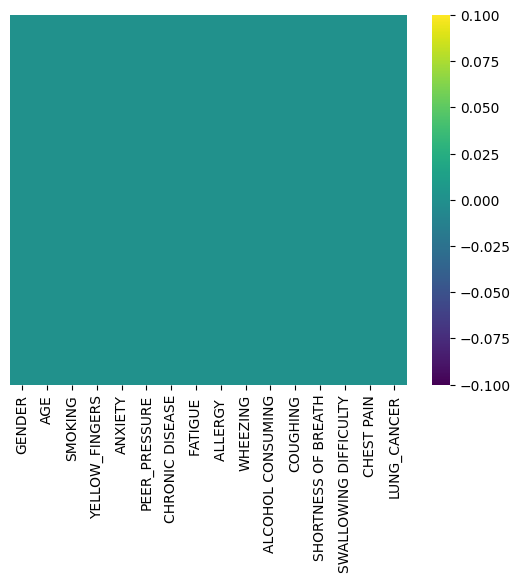

In [ ]:
#we can use seaborn to create a simple heatmap to see where are missing data
#yticklabel is index(record labels)
sns.heatmap(data.isnull(), yticklabels=False,cmap='viridis')

In [ ]:
#encoding
data["GENDER"]=data["GENDER"].replace(["M","F"],[0,1])
data["GENDER"]

0      0
1      0
2      1
3      0
4      1
      ..
304    1
305    0
306    0
307    0
308    0
Name: GENDER, Length: 309, dtype: int64

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

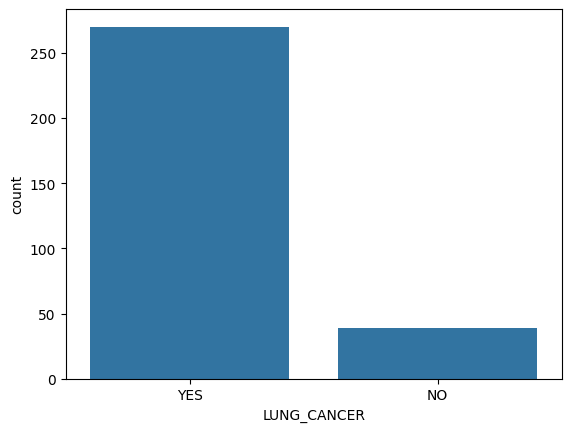

In [ ]:
sns.countplot(x="LUNG_CANCER",data=data)

In [ ]:
target=data.iloc[:,15]
target


0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object

In [ ]:
train_data=data.iloc[:,0:15]
train_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2


<Axes: xlabel='SMOKING', ylabel='count'>

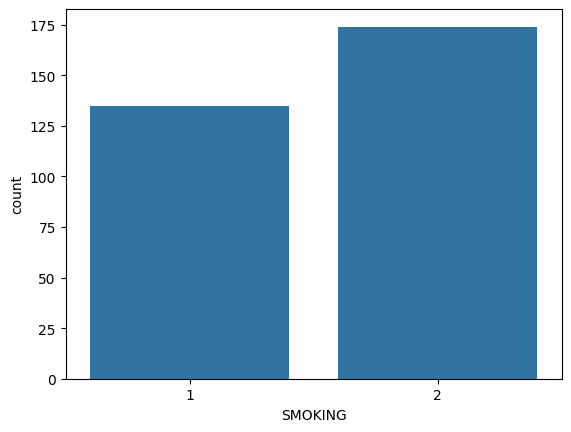

In [ ]:
sns.countplot(x="SMOKING",data=data)

In [ ]:
#understanding relationship among features
train_data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
GENDER,1.000000,-0.021306,-0.036277,0.212959,0.152127,0.275564,0.204606,0.083560,-0.154251,-0.141207,-0.454268,-0.133303,0.064911,0.078161,-0.362958
AGE,-0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,-0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,-0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640


<Axes: >

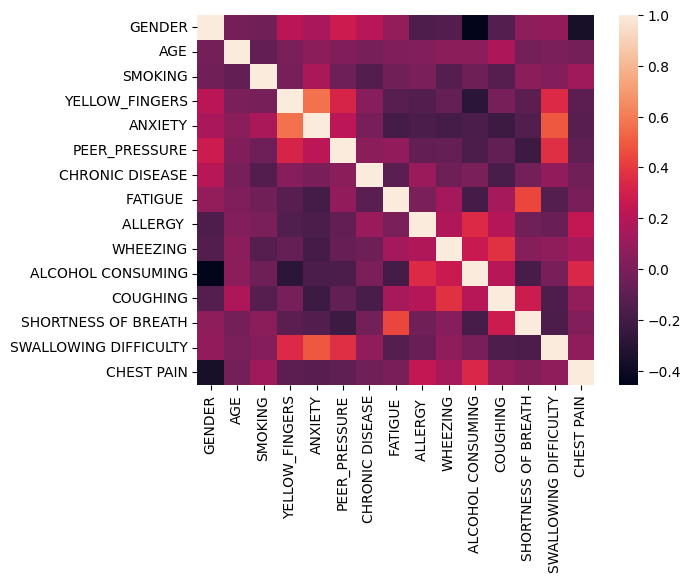

In [ ]:
sns.heatmap(train_data.corr())

In [ ]:
#splitting data into training and testing sets
#stratify parametre split bases on equally distribued labled value
#random state parametre reproduce the same tarining & testing set of data every time on excuting tarin_test split code
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_data, target, test_size=0.33, random_state=42,stratify=target)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(X_train)
scaled_test_data =scaler.transform( X_test)


In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
n=8  # Choose the number of principal components
pca = PCA(n_components=n)
pca_train_data = pca.fit_transform(scaled_train_data)
pca_test_data=pca.transform(scaled_test_data)


In [ ]:
#model
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(max_iter=1000)

In [ ]:
#apply model
logistic.fit(pca_train_data, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictd_value=logistic.predict(pca_test_data)

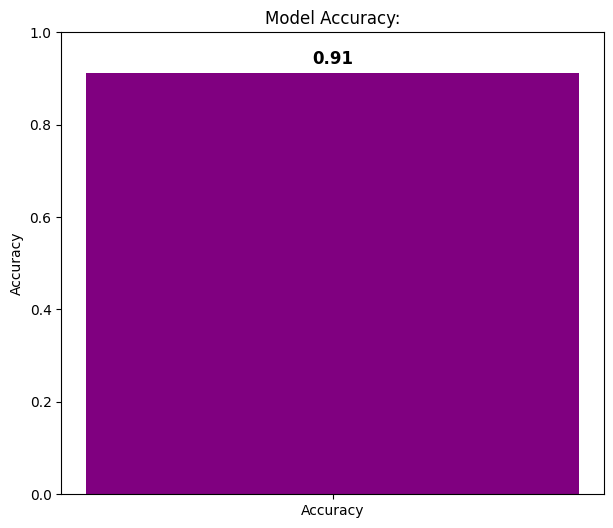

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy=accuracy_score(predictd_value,y_test)
plt.figure(figsize=(7, 6))
plt.bar(['Accuracy'], [accuracy], color='purple')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1
plt.ylabel('Accuracy')
plt.title('Model Accuracy:')

# Annotating the accuracy score on the bar
for i, v in enumerate([accuracy]):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold', fontsize=12)

plt.show()


In [ ]:
cm=confusion_matrix(predictd_value,y_test)

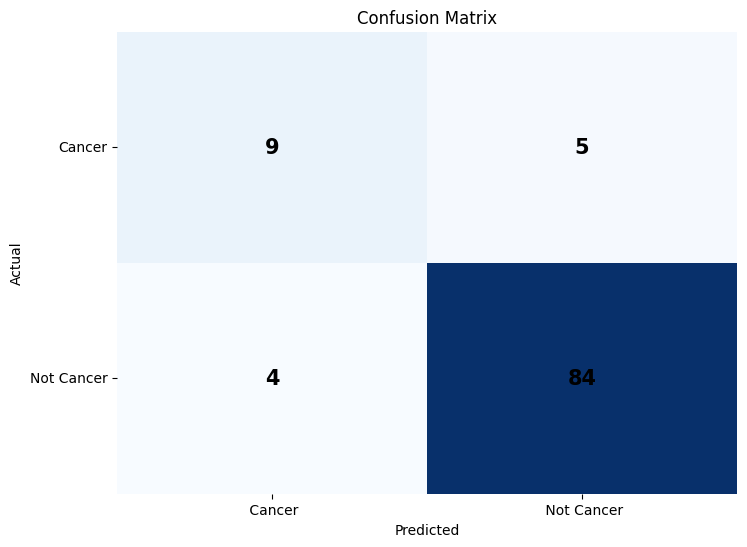

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                 annot_kws={"size": 15, "weight": "bold", "color": "black"})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.set_xticklabels([' Cancer', ' Not Cancer'])
ax.set_yticklabels(['Cancer', 'Not Cancer'], rotation=0)

plt.show()

In [ ]:
# Define new input data
new_data=["M",77,"yes","No","yes","No","No","yes","No","No","No","yes","No","No","No"]
# Define a function to replace values
def replace_value(x):
    if x == "yes":
        return 2
    elif x == "No":
        return 1
    else:
        if x=="M":
          return 0
        elif x=="F":
          return 1
        else:
          return x

# Replace values using the function
new_list = [replace_value(x) for x in new_data]

print(new_list)

[0, 77, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1]


In [ ]:
import numpy as np
new_data = np.array([new_list])  # Example new input data


# Standardize the new input data
new_data_scaled = scaler.transform(new_data)

# Apply PCA to the standardized new input data
new_data_pca = pca.transform(new_data_scaled)

# Predict using the trained logistic regression model
new_prediction = logistic.predict(new_data_pca)

# Output the prediction
print("New Input Data Prediction:", new_prediction)

New Input Data Prediction: ['NO']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
